In [104]:
import numpy as np
from scipy import signal
import mne

Text(0.5, 1.0, 'EEG data (F3)')

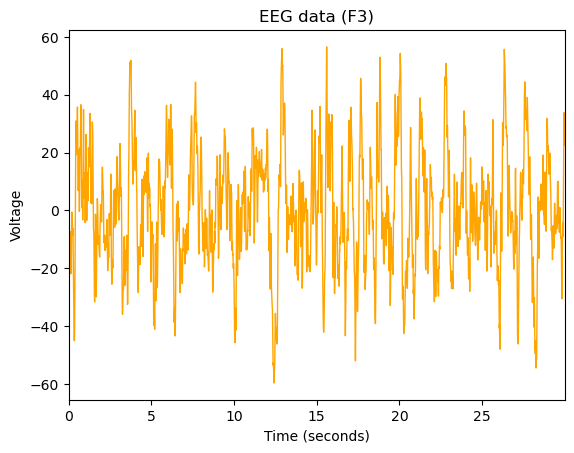

In [13]:
#loading data
file="eeg-data.txt"
data = np.loadtxt(file)
import matplotlib.pyplot as plt

# sampling frequency and time vector
sf = 100.
time = np.arange(data.size) / sf

# Plot the signal
plt.plot(time, data, lw=1, color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('EEG data (F3)')

Text(0, 0.5, 'Power spectral density (V^2 / Hz)')

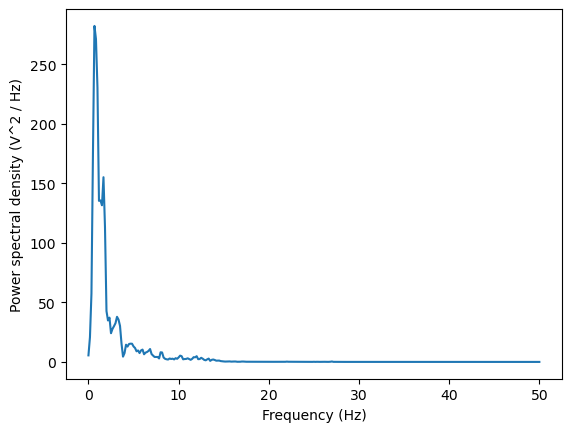

In [125]:
fq,psd =signal.welch(data, fs=100, window ='hann',nperseg=600)
plt.plot(fq,psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')

In [121]:
bands={'Delta':(1,4),'Theta':(4,8),'Alpha':(8,13),'Beta':(13,30)}
ab_bands={'Delta':0,'Theta':0,'Alpha':0,'Beta':0}

In [129]:
#calculating absolute band power over freq using trapizoidal rule since they are more efficient for narrow peak life functions 
for band, (low, high) in bands.items():
    indices = np.where((fq >= low) & (fq <high))[0]
    ab_pw=np.trapz(psd[indices], fq[indices])
    ab_bands[band] = ab_pw
for i in ab_bands:
    print(i,"absolute band power:",ab_bands[i])

Delta absolute band power: 189.48331916861665
Theta absolute band power: 36.014710352035195
Alpha absolute band power: 15.63088908678541
Beta absolute band power: 4.685215908570305


In [130]:
#calulating relative bandpowers 
total=sum(ab_bands.values())
for i in ab_bands:
    rel=(ab_bands[i])*100/total
    print(i,"relative band power:",rel)

Delta relative band power: 77.08398035845144
Theta relative band power: 14.651195881370237
Alpha relative band power: 6.358824368485417
Beta relative band power: 1.9059993916929137


In [ ]:
#MULTITAPER

In [119]:
psdm,fqm=mne.time_frequency.psd_array_multitaper(data,sfreq=100,fmin=0.5,fmax=50,adaptive=True,low_bias=True,normalization='full',remove_dc=False,output='power')

    Using multitaper spectrum estimation with 7 DPSS windows


Text(0, 0.5, 'Power spectral density (V^2 / Hz)')

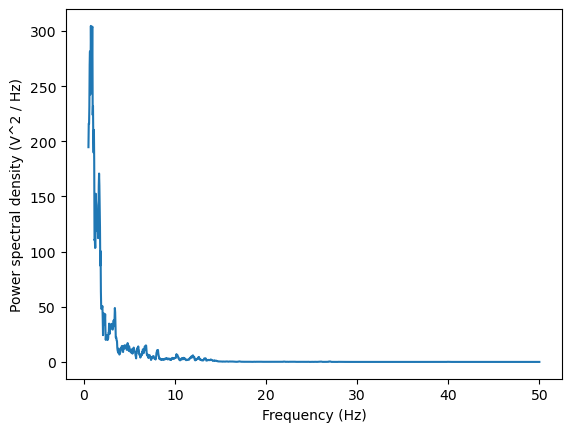

In [120]:
plt.plot(fqm,psdm)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')

In [136]:
bands={'Delta':(1,4),'Theta':(4,8),'Alpha':(8,13),'Beta':(13,30)}
ab_bands={'Delta':0,'Theta':0,'Alpha':0,'Beta':0}
#calculating absolute band power over freq using trapizoidal rule since they are more efficient for narrow peak life functions 
for band, (low, high) in bands.items():
    indices = np.where((fqm >= low) & (fqm <high))[0]
    ab_pw=np.trapz(psdm[indices], fqm[indices])
    ab_bands[band] = ab_pw
for i in ab_bands:
    print(i,"absolute band power:",ab_bands[i])

Delta absolute band power: 182.07014269431437
Theta absolute band power: 35.86392582830738
Alpha absolute band power: 16.287078385615814
Beta absolute band power: 4.816283570066267


In [132]:
#calulating relative bandpowers 
total=sum(ab_bands.values())
for i in ab_bands:
    rel=(ab_bands[i])*100/total
    print(i,"relative band power:",rel)

Delta relative band power: 76.16804712550653
Theta relative band power: 15.0034769686677
Alpha relative band power: 6.813610049700608
Beta relative band power: 2.0148658561251627
